## **Definición del problema:**

# Contexto

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

In [2]:
#Librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix
from sklearn.metrics import roc_curve , auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.impute import SimpleImputer
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [3]:

#Repositorio GitHub
! git clone https://github.com/davidcontrerasf/mat281_portfolio.git

Cloning into 'mat281_portfolio'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 196 (delta 74), reused 84 (delta 31), pack-reused 12
Receiving objects: 100% (196/196), 17.20 MiB | 19.76 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [4]:
train_df = pd.read_csv("/content/mat281_portfolio/docs/projects/train.csv")
test_df = pd.read_csv("/content/mat281_portfolio/docs/projects/test.csv")

# Estadística Descriptiva

In [5]:
#Dimensiones del df
print("Dimensiones del Conjunto de Entrenamiento: ",train_df.shape)
print("Dimensiones del Conjunto de Prueba: ",test_df.shape)

Dimensiones del Conjunto de Entrenamiento:  (8693, 14)
Dimensiones del Conjunto de Prueba:  (4277, 13)


In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Nota: En los datos de prueba, falta la columna 'Transported' que sí está presente en los datos de entrenamiento. Por consiguiente, será necesario desarrollar un modelo para predecir esta información.

In [8]:
#Veamos si hay datos duplicados
print(f"Los duplicados del conjunto de entrenamiento: {train_df.duplicated().sum()}")
print(f"Los duplicados del conjunto de prueba: {test_df.duplicated().sum()}")

Los duplicados del conjunto de entrenamiento: 0
Los duplicados del conjunto de prueba: 0


In [9]:
#Tipo de datos del conjunto de entrenamiento
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
#Tipo de datos del conjunto de prueba
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [11]:
#Verificamos el número de datos faltantes en el conjunto de entrenamiento
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
#Verificamos el número de datos faltantes en el conjunto de prueba
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Visualización Descriptiva

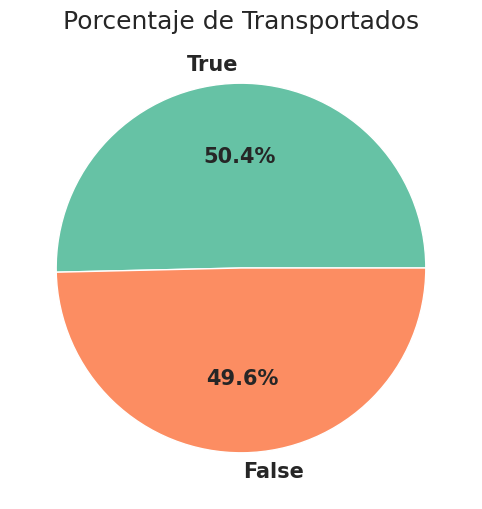

In [14]:
#Visualización de los transportados
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels = train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":15,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Porcentaje de Transportados");

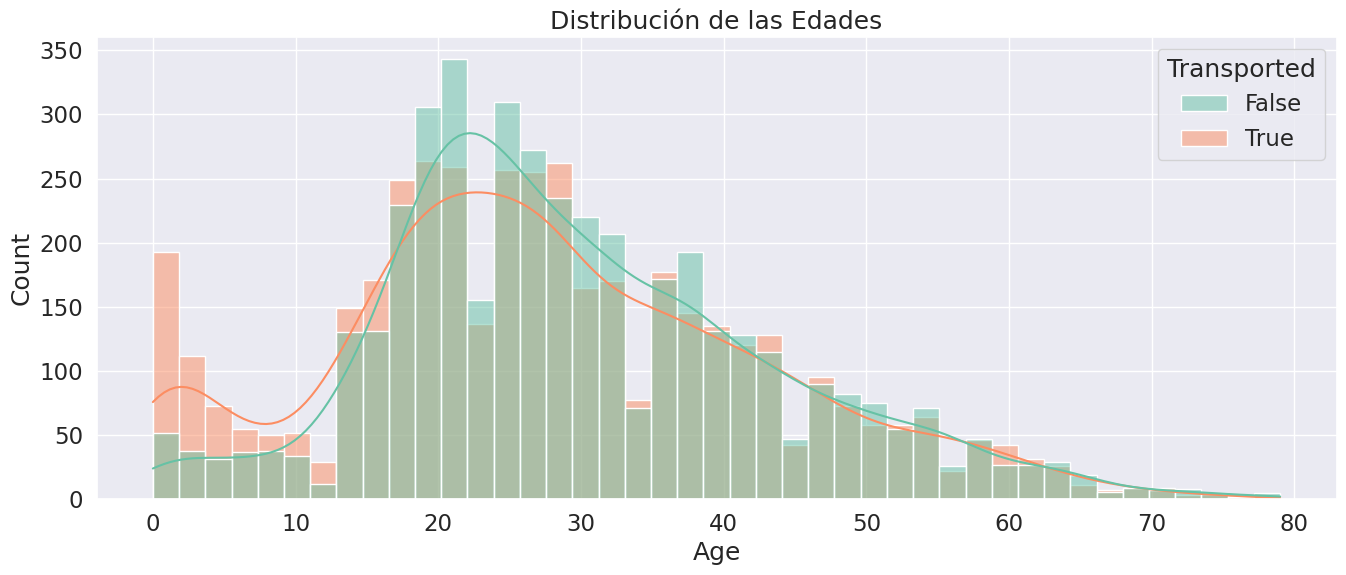

In [15]:
#Visualización de la distribución de edades
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")

plt.title("Distribución de las Edades");


Conclusiones obtenidas:

- Se observa que entre los 0 y los 18 años, hay más individuos transportados que no transportados, especialmente entre los recién nacidos.
- En el rango de edades entre 18 y 32 años, la proporción de individuos transportados disminuye en comparación con la cantidad total de pasajeros, dado que esta franja etaria concentra mayor cantidad de pasajeros en términos absolutos.
- Para las personas mayores de 32 años, se aprecia una paridad entre aquellos transportados y los no transportados.
Idea sugerida: Se propone la creación de una nueva columna llamada 'Age-Category' donde las diferentes edades puedan ser subdivididas en categorías.

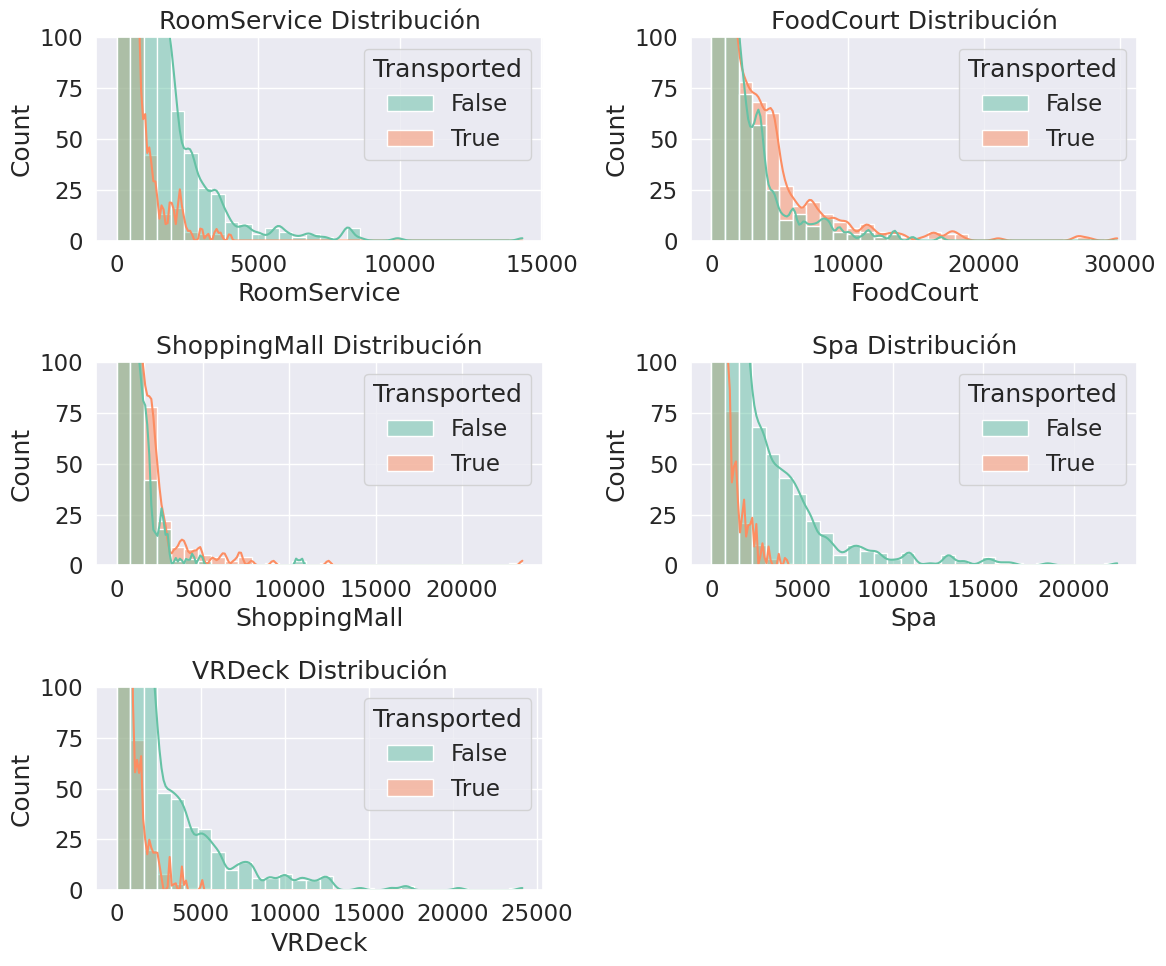

In [16]:
#Visualización de la distribución de las caracteristicas asociadas a los gastos
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(12,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribución")
    plt.ylim(0,100)
    plt.tight_layout()


Observación: Se evidencia que la mayoría de los pasajeros no tienen un gasto significativo.

Debido a que la mayoría de los registros muestran gastos de 0, aquellos con cifras más elevadas son considerados atípicos.
Se ha observado una similitud en la distribución entre 'RoomService', 'Spa' y 'VRDeck'.
De manera similar, se ha identificado una similitud en la distribución entre 'FoodCourt' y 'ShoppingMall'.
Los pasajeros con gastos más bajos tienen una probabilidad mayor de ser transportados en comparación con aquellos con gastos más altos.
Idea: Se propone la creación de una nueva función denominada "Gasto Total" que refleje el total de los diferentes gastos realizados por los pasajeros.

Considerando que la mayoría de las personas tienen un gasto de 0, se sugiere la creación de una función booleana llamada "Sin Gasto" que indique si el gasto total del pasajero es 0 o no.

Además, se plantea la posibilidad de dividir el "Gasto Total" en distintas categorías, como Gastos Bajos, Medios y Altos, con la finalidad de crear una nueva función denominada "Categoría de Gastos".

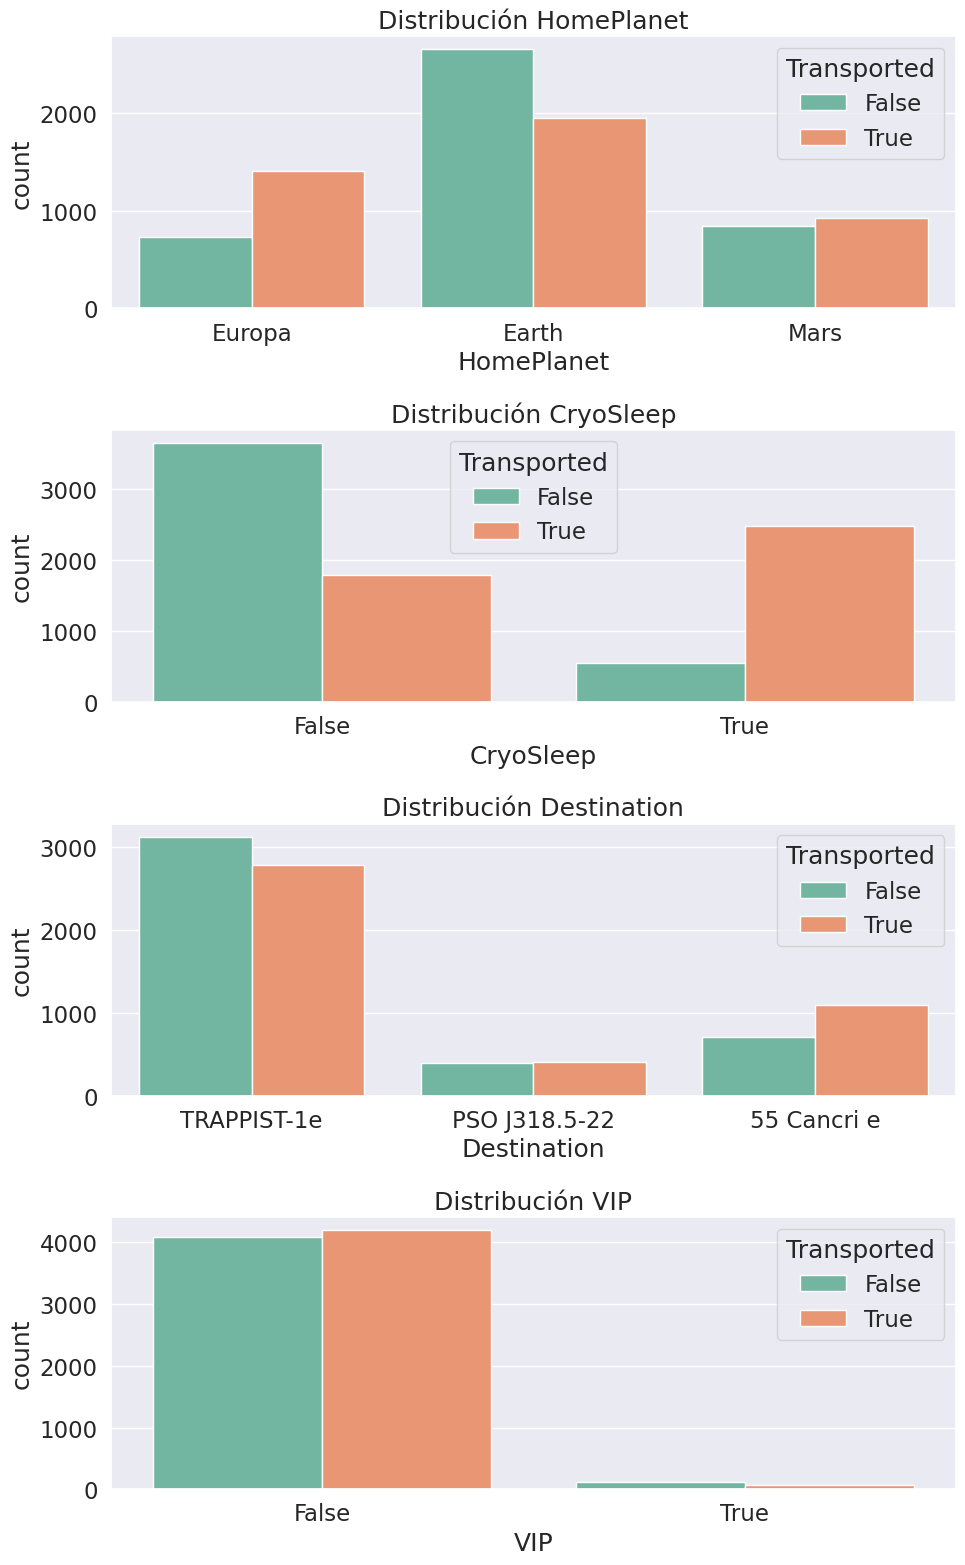

In [17]:
#Visualización de las caracteristicas categoricas
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(10,16))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"Distribución {column}")
    plt.tight_layout()

En relación a 'HomePlanet', se percibe que la mayoría de los pasajeros proceden de la Tierra; no obstante, en comparación, son menos transportados. Los pasajeros provenientes de Marte son transportados con una frecuencia similar, mientras que aquellos de Europa tienen una alta tasa de transporte.

En cuanto a 'Destination', se destaca que la mayoría de los pasajeros son transportados hacia Trappist-1e.

Se ha observado que la categoría 'VIP' presenta una disparidad tan marcada que podría ocasionar un sobreajuste en el modelo. Por consiguiente, se opta por su eliminación.

# Preprocesamiento

In [18]:
def passengerid_nuevos_atributos(df):

    #Separamos en Grupo y Miembro.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] = df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Agrupamos la función "Group" con respecto a la función "Membre" para cuántos miembros viajan en cada grupo
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creamos un set de grupos que viajan con más de 1 miembro.
    y = set(x[x>1].index)

    #Creamos "Travelling_Solo" que indica si una persona viaja o no sola
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creamos un atributo "Group_size" que indica el numero de miembros en el grupo
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [19]:
passengerid_nuevos_atributos(train_df)
passengerid_nuevos_atributos(test_df)

In [20]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

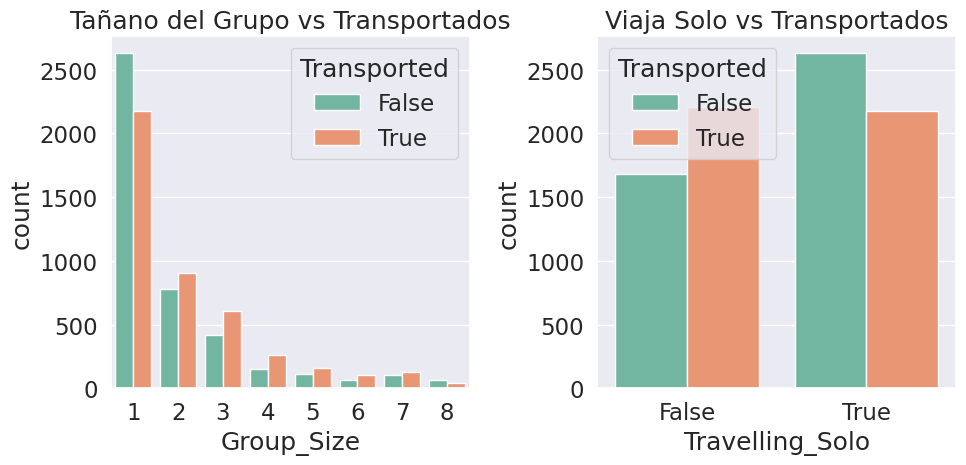

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Tañano del Grupo vs Transportados")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Viaja Solo vs Transportados")
plt.tight_layout()
plt.show()


En relación a 'Group_Size', se observa que la mayoría de los pasajeros viajan solos.

Por otro lado, al analizar 'Travelling_Solo', se evidencia que los pasajeros que viajan solos tienen una tasa de transporte menor en comparación con aquellos que viajan en grupo.

En cuanto a la característica 'cabin', esta describe la ubicación y características específicas de la cabina, detallando 'deck/num//side', donde:

- 'Deck' indica la ubicación en la cubierta.
- 'Num' representa el número de cubierta.
- 'Side' distingue entre 'P' para babor y 'S' para estribor.

Para desglosar estos tres valores de la cabina, se proponen tres nuevos atributos: 'Cabin_Deck', 'Cabin_Number' y 'Cabin_Side'.

Es relevante señalar que la función 'Cabin' contiene valores NaN. Para evitar posibles errores al dividir, se sugiere reemplazar estos valores NaN de manera que puedan ser distribuidos adecuadamente entre las tres nuevas funciones correspondientes.

In [22]:
def cabin_nuevos_atributos(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #De esta manera podemos dividir los valores NaN en tres categorías

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])

    #Reemplazamos de valores nan por valores numpy nan
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)

    #Completamos los valores faltantes en los nuevos atributos creados
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [23]:
cabin_nuevos_atributos(train_df)
cabin_nuevos_atributos(test_df)

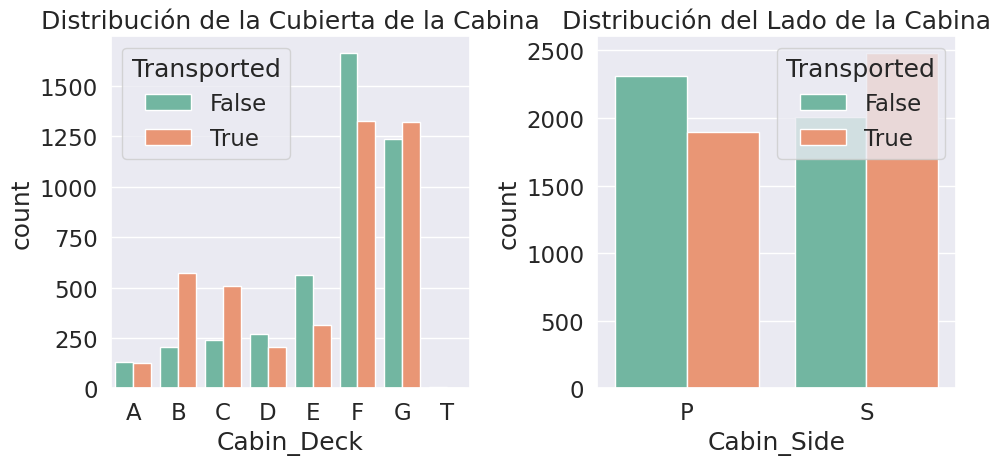

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Distribución de la Cubierta de la Cabina")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Distribución del Lado de la Cabina")
plt.tight_layout()
plt.show()

In [25]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

In [26]:
#Calculamos algunas estadisticas de 'Cabin_Number'
print("El total de valores únicos presentes en 'Cabin_Number' es: ",train_df["Cabin_Number"].nunique())
print("La media de 'Cabin_Number' es: ",train_df["Cabin_Number"].mean())
print("La mediana de 'Cabin_Number' es: ",train_df["Cabin_Number"].median())
print("El minimo de 'Cabin_Number' es: ",train_df["Cabin_Number"].min())
print("El Maximo de 'Cabin_number' es: ",train_df["Cabin_Number"].max())

El total de valores únicos presentes en 'Cabin_Number' es:  1817
La media de 'Cabin_Number' es:  596.3989416772115
La mediana de 'Cabin_Number' es:  427.0
El minimo de 'Cabin_Number' es:  0
El Maximo de 'Cabin_number' es:  1894


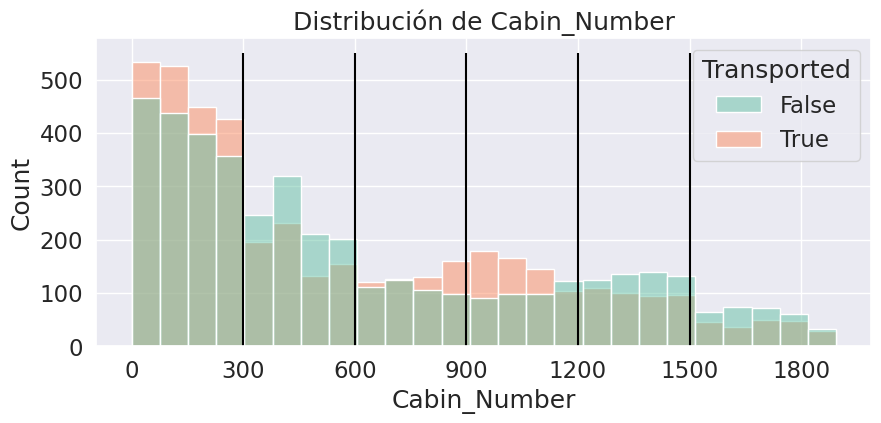

In [27]:
#Visualización de 'Cabin_Number'
plt.figure(figsize=(10,4))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Distribución de Cabin_Number")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

In [28]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [29]:
cabin_regions(train_df)
cabin_regions(test_df)


In [30]:
#Ya no necesitamos "Cabin_Number por lo que lo eliminamos del conjunto de datos
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

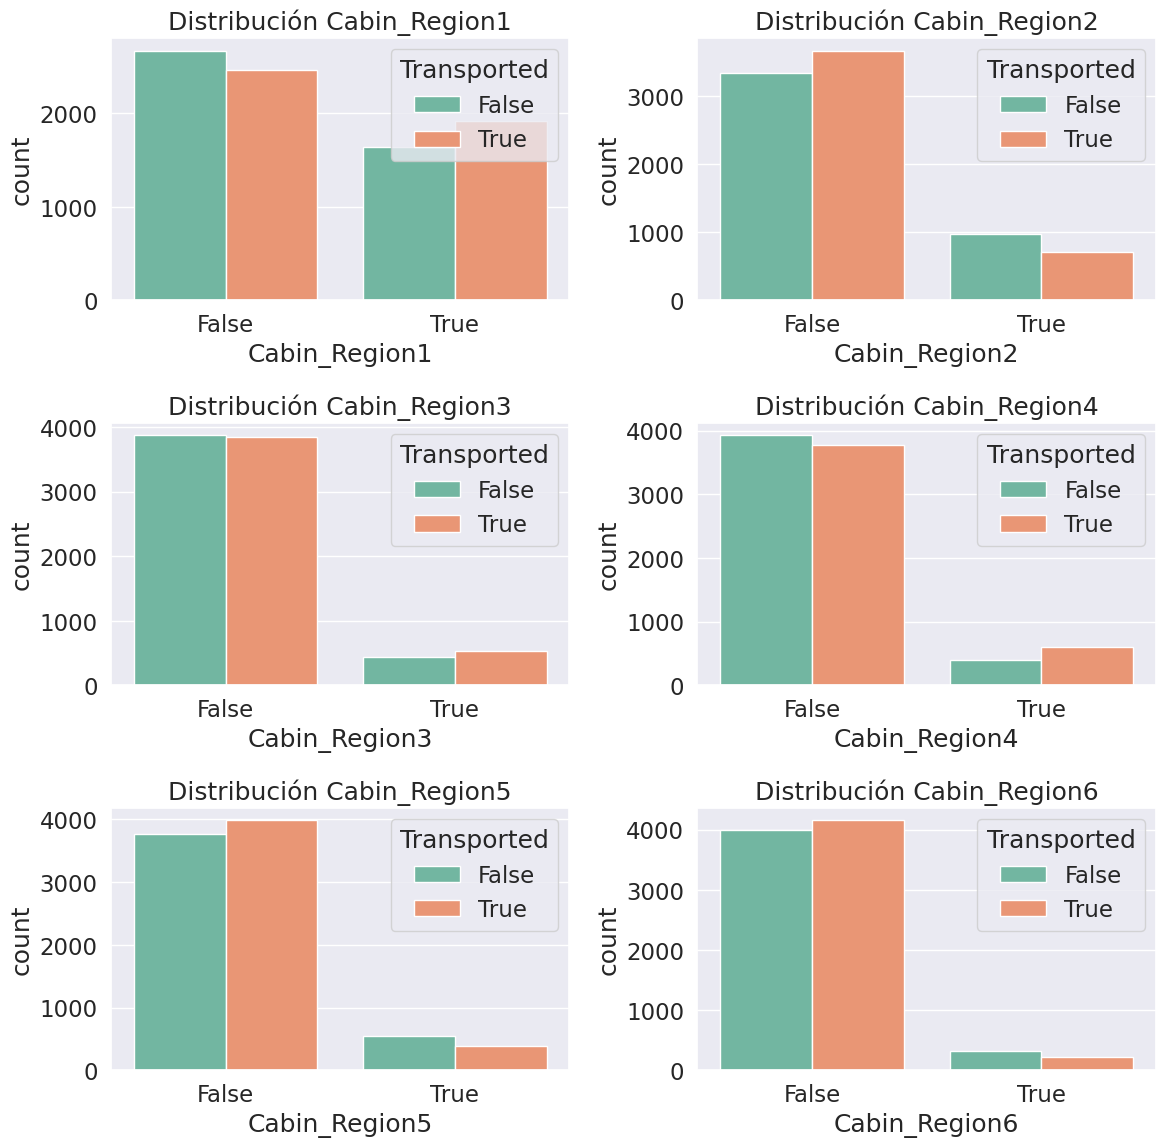

In [31]:
#Visualizamos las Regiones
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(12,15))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"Distribución {value}")
    plt.tight_layout()

Observación:

Se ha observado que los pasajeros de la Región 1 tienen una alta tasa de transporte en comparación con las demás regiones.
Además, se percibe que a medida que aumenta el número de regiones, disminuye la cantidad de pasajeros transportados.
Como se ha mencionado previamente, se crearán nuevos atributos para representar los rangos de edades.

In [32]:
def rango_etario(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_12-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33-50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)

    df["Age_Group"] = age_group

In [33]:
rango_etario(train_df)
rango_etario(test_df)

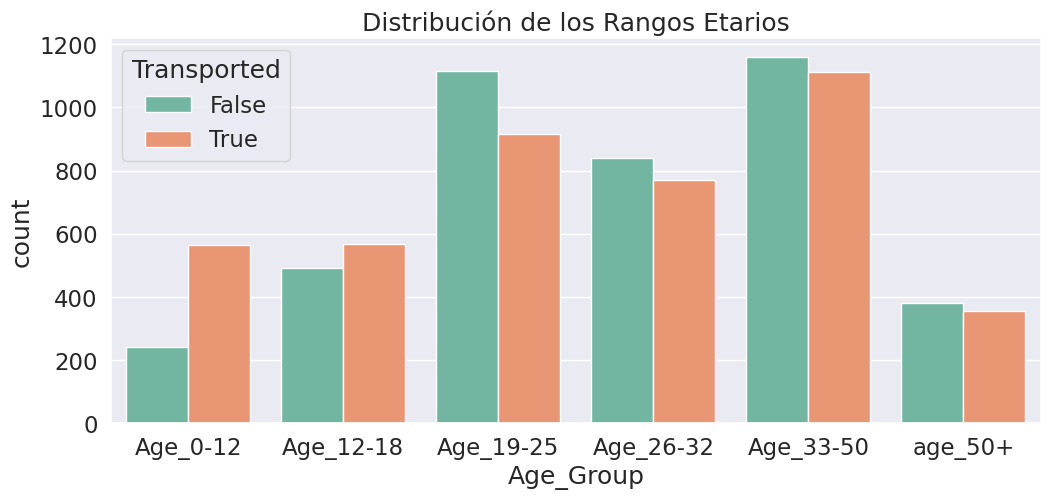

In [34]:
#Visualizamos los Rangos Etarios
order = sorted(train_df["Age_Group"].value_counts().keys().to_list())

plt.figure(figsize=(12,5))
sns.countplot(x="Age_Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Distribución de los Rangos Etarios");

Observación:

Se ha notado que los grupos 'Age_0-12' y 'Age_12-18' tienen mayores probabilidades de ser transportados que de no serlo.
En contraste, los grupos 'Age_19-25', 'Age_26_32' y 'Age_33_50' muestran menores probabilidades de ser transportados en comparación con los que sí lo son.
El grupo 'Age_50+' muestra una tasa casi equitativa entre los transportados y los no transportados.

En cuanto a las variables "RoomService", "FoodCourt", "ShoppingMall", "Spa" y "VRDeck":

Se propone la creación de un nuevo atributo llamado 'Total_Expenditure' que represente el gasto total del pasajero.
Se sugiere generar una función booleana llamada 'No_Spending' a partir de 'Total_Expenditure', que indique Verdadero si el pasajero ha gastado 0 en total.
Además, se plantea la idea de segmentar 'Total_Expenditure' en diferentes categorías, como 'No_Expense', 'Low_Expense', 'Medium_Expense' o 'High_Expense', con el fin de crear una nueva categoría denominada 'Expenditure_Category'.

In [35]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def exp_nuevos_atributos(df):
    df["Total_Expenditure"] = df[exp_cols].sum(axis=1)
    df["No_Spending"] = (df["Total_Expenditure"]==0)

In [36]:
exp_nuevos_atributos(train_df)
exp_nuevos_atributos(test_df)

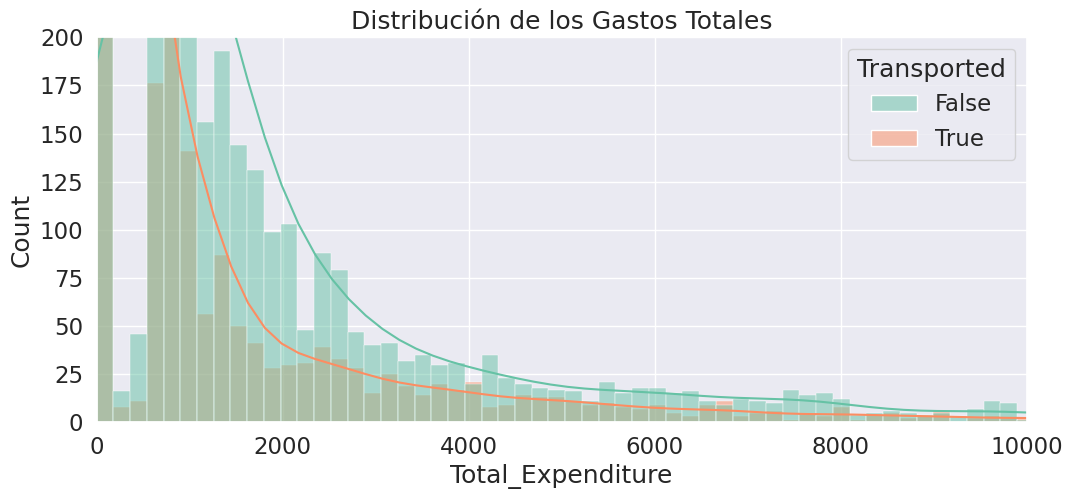

In [37]:
#Visualizamos "Total_Expenditure"
plt.figure(figsize=(12,5))
sns.histplot(x="Total_Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Distribución de los Gastos Totales");

In [38]:
#Calculamos algunas estadisticas de 'Total_Expenditure'
mean = round(train_df["Total_Expenditure"].mean())
median = train_df["Total_Expenditure"].median()

print("El promedio de 'Total_Expenditure' es = ",mean)
print("La mediana de 'Total_Expenditure'es = ",median)

El promedio de 'Total_Expenditure' es =  1441
La mediana de 'Total_Expenditure'es =  716.0


In [39]:
def expenditure_category(df):
    expense_category = []

    for i in df["Total_Expenditure"]:
        if i==0:
            expense_category.append("No_Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low_Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium_Expense")
        elif (i>1441):
            expense_category.append("High_Expense")

    df["Expenditure_Category"] = expense_category

In [40]:
expenditure_category(train_df)
expenditure_category(test_df)

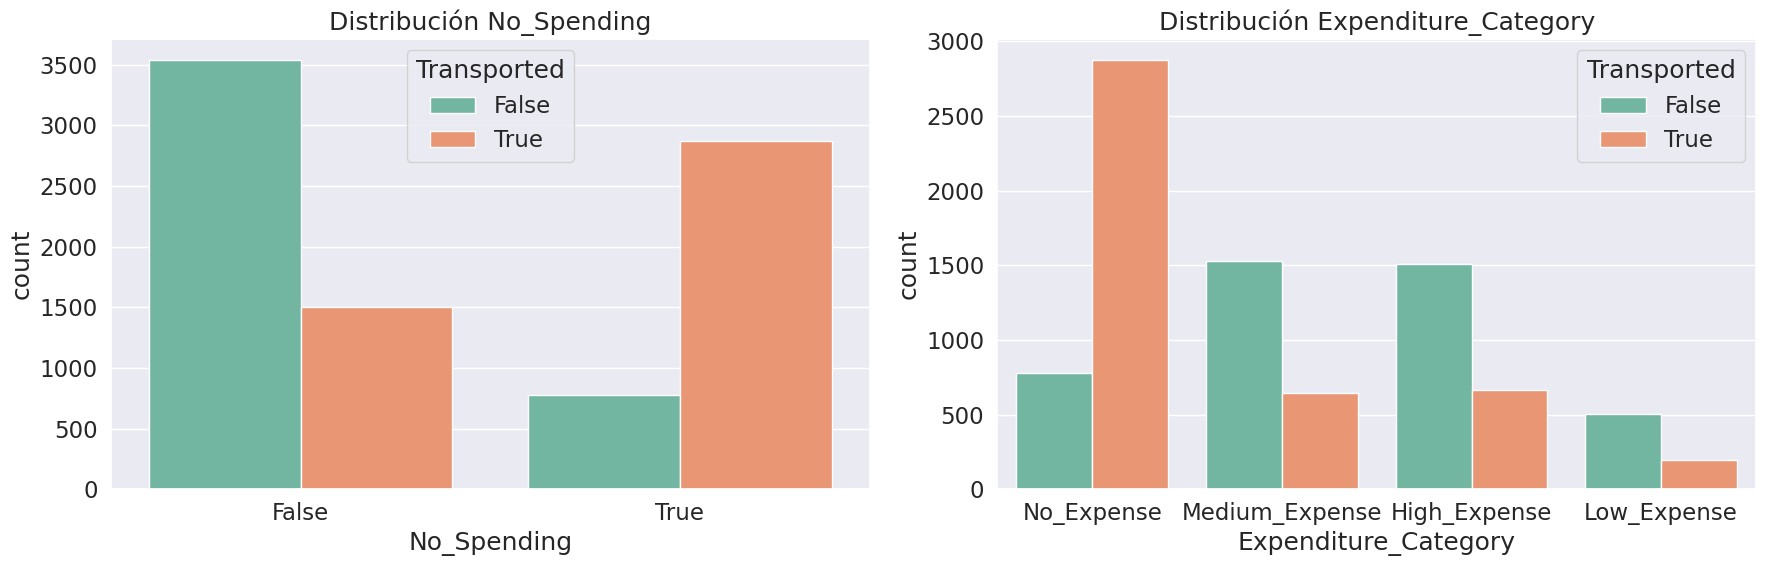

In [41]:
cols = ["No_Spending", "Expenditure_Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"Distribución {column}")
    plt.tight_layout()


Observación:

-En 'Total_Expenditure' notamos que es probable que los pasajeros con 'Low_Expense' sean mayormente transportados.

-En 'No_Spending' notamos que los pasajeros que no tienen gasto son altamente transportados.

-En 'Expenditure_Category' confirmamos que los pasajeros que no tienen gastos son altamente transportados.

# Pre Procesamiento

In [42]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [43]:
#Completamos los datos vacios con el más frecuente y el valor medio
imputer1 = SimpleImputer(strategy="most_frequent")     # Para completar los datos categorias
imputer2 = SimpleImputer(strategy="median")            # Para completar los datos numericos

In [44]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [45]:
fill_missingno(train_df)
fill_missingno(test_df)

In [46]:
print("Los números que faltan en train_df son: ",train_df.isnull().sum().sum())
print("Los números que faltan en test_df son: ",test_df.isnull().sum().sum())

Los números que faltan en train_df son:  0
Los números que faltan en test_df son:  0


In [47]:
print("Los valores duplicados en los datos de entrenamiento son: ",train_df.duplicated().sum())
print("Los valores duplicados en los datos de prueba son: ",test_df.duplicated().sum())

Los valores duplicados en los datos de entrenamiento son:  0
Los valores duplicados en los datos de prueba son:  0


In [48]:
#Hacemos un DataFrame que usaremos para las prediciones finales
pass_df = test_df[["PassengerId"]]

In [49]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

In [50]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total_Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


In [51]:
#Aplicamos transformación Logaritmica
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])


In [52]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age_Group                object
Total_Expenditure       float64
No_Spending              object
Expenditure_Category     object
dtype: object

In [53]:
#Cambiamos el tipo de dato a Booleano
cols = ["CryoSleep","VIP","Travelling_Solo","No_Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [54]:
#Haremos One Hot Encoding para características categóricas nominales.
#Haremos LabelEncoding para características categóricas ordinales.
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age_Group","No_Spending",
                    "Expenditure_Category"]


In [55]:
#LabelEncoding
enc = LabelEncoder()


In [56]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [57]:
#One Hot Encoding
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

In [58]:
#Todavía nos queda 'Transported' para codificar en el conjunto de datos de entrenamiento.
train_df["Transported"].replace({False:0,True:1},inplace=True)

# Modelos

In [59]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [60]:
#Estandarizamos los datos
scaler = StandardScaler()

In [61]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

In [62]:
#Se dividen los datos para modelos que no necesitan datos estandarizados
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


In [64]:
#Se dividen los datos para modelos que si necesitan datos estandarizados
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [65]:
print(x_train1.shape, y_train1.shape)
print(x_test1.shape, y_test1.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


# Modelo para Datos Estandarizados

In [66]:
training_score = []
testing_score = []

In [67]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy_Score del modelo {model} en el conjunto de Entrenamiento es: ",a)
    print(f"Accuracy_Score del modelo {model} en el conjunto de Testeo es: ",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score del modelo {model} es: ",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score del modelo {model} es:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score del modelo {model} es:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"La Matriz de Confusion del modelo {model} es: ")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score del modelo LogisticRegression() en el conjunto de Entrenamiento es:  77.8688524590164
Accuracy_Score del modelo LogisticRegression() en el conjunto de Testeo es:  77.17078780908568

------------------------------------------------------------------------
Precision Score del modelo LogisticRegression() es:  0.7578040904198062
Recall Score del modelo LogisticRegression() es: 0.8036529680365296
F1 Score del modelo LogisticRegression() es: 0.7800554016620498

------------------------------------------------------------------------
La Matriz de Confusion del modelo LogisticRegression() es: 


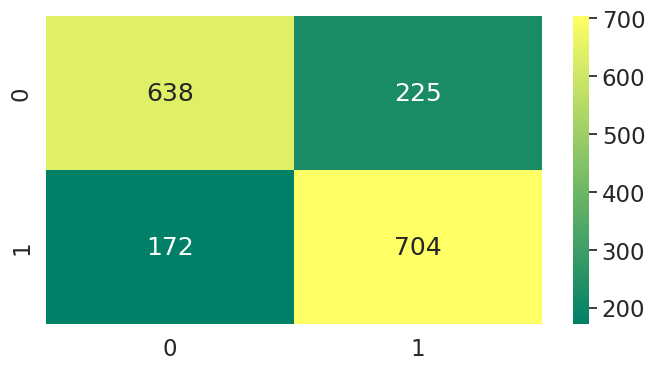

In [68]:
#Modelo de Regresion Logistica
model_prediction(LogisticRegression())

Accuracy_Score del modelo SVC() en el conjunto de Entrenamiento es:  81.8234109864826
Accuracy_Score del modelo SVC() en el conjunto de Testeo es:  79.700977573318

------------------------------------------------------------------------
Precision Score del modelo SVC() es:  0.7995418098510882
Recall Score del modelo SVC() es: 0.7968036529680366
F1 Score del modelo SVC() es: 0.7981703830760436

------------------------------------------------------------------------
La Matriz de Confusion del modelo SVC() es: 


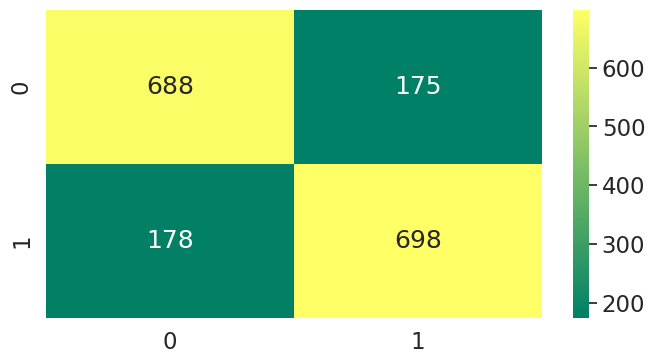

In [69]:
#Modelo de Support-Vector-Classifier
model_prediction(SVC())

# Modelo para Datos NO Estandarizados

In [70]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy_Score del modelo {model} en el conjunto de Entrenamiento es: ",a)
    print(f"Accuracy_Score del modelo {model} en el conjunto de Testeo es: ",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score del modelo {model} es: ",precision_score(y_test,x_test_pred))
    print(f"Recall Score del modelo {model} es:",recall_score(y_test1,x_test_pred))
    print(f"F1 Score del modelo {model} es:",f1_score(y_test1,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"La Matriz de Confusion del modelo {model} es: ")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score del modelo RandomForestClassifier() en el conjunto de Entrenamiento es:  98.53321829163072
Accuracy_Score del modelo RandomForestClassifier() en el conjunto de Testeo es:  79.64347326049453

------------------------------------------------------------------------
Precision Score del modelo RandomForestClassifier() es:  0.8175182481751825
Recall Score del modelo RandomForestClassifier() es: 0.7671232876712328
F1 Score del modelo RandomForestClassifier() es: 0.7915194346289752

------------------------------------------------------------------------
La Matriz de Confusion del modelo RandomForestClassifier() es: 


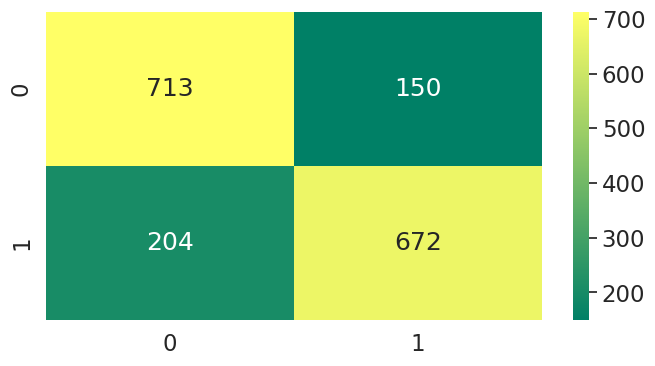

In [71]:
#Modelo de Random-Forest
model_prediction(RandomForestClassifier())

Accuracy_Score del modelo GradientBoostingClassifier() en el conjunto de Entrenamiento es:  82.053494391717
Accuracy_Score del modelo GradientBoostingClassifier() en el conjunto de Testeo es:  79.29844738355378

------------------------------------------------------------------------
Precision Score del modelo GradientBoostingClassifier() es:  0.7721518987341772
Recall Score del modelo GradientBoostingClassifier() es: 0.8356164383561644
F1 Score del modelo GradientBoostingClassifier() es: 0.8026315789473685

------------------------------------------------------------------------
La Matriz de Confusion del modelo GradientBoostingClassifier() es: 


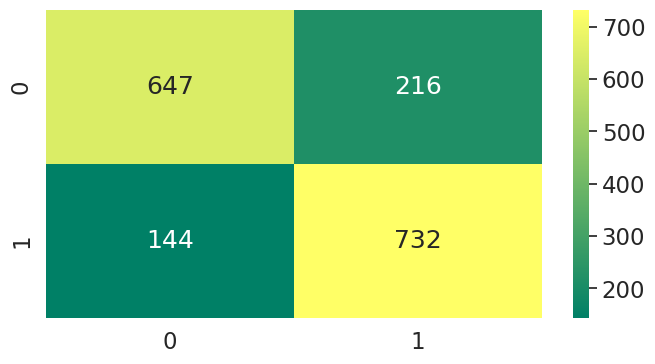

In [72]:
#Modelo de Gradient-Boosting
model_prediction(GradientBoostingClassifier())

# Métricas y Análisis de resultados

In [73]:
models = ["Logistic Regression","SVM","Random Forest","Gradient Boost"]

In [74]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [75]:
df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.868852,77.170788
1,SVM,81.823411,79.700978
2,Random Forest,98.533218,79.643473
3,Gradient Boost,82.053494,79.298447


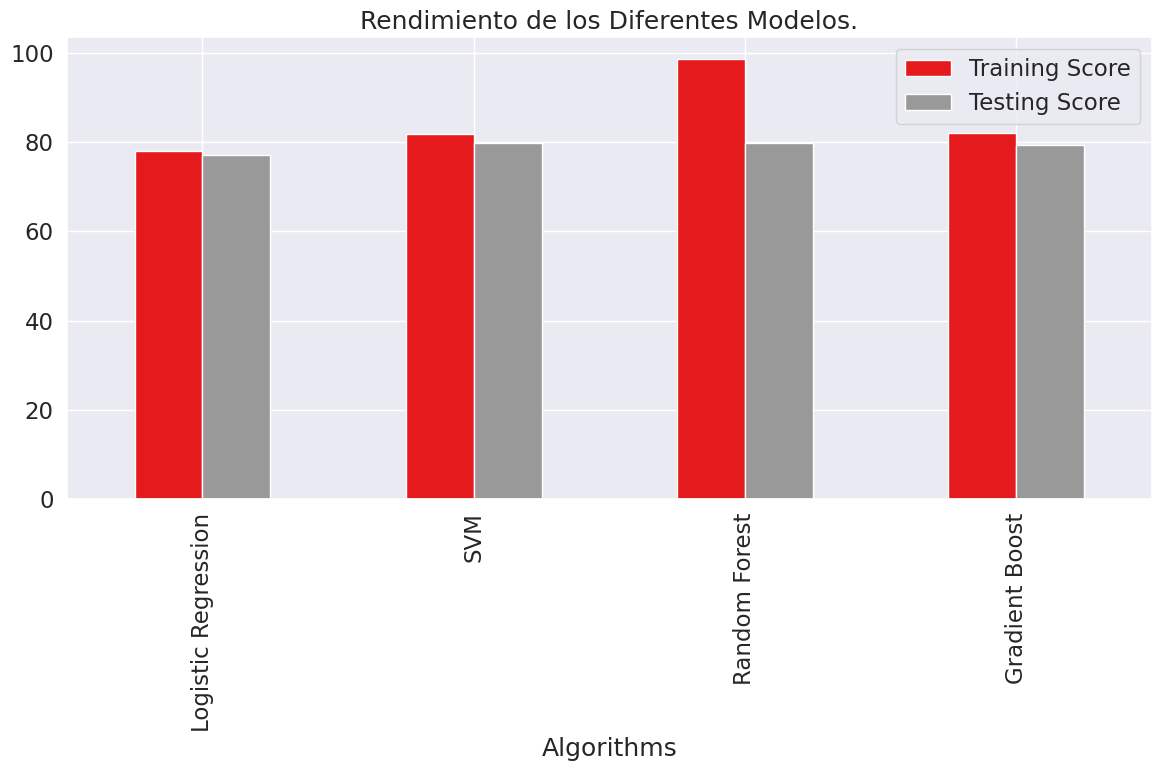

In [76]:
#Visualización de los resultados anteriores usando un gráfico de barras.
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(14,6),kind="bar",
        title="Rendimiento de los Diferentes Modelos.",colormap="Set1")
plt.show()

Observación:

Se han seleccionado los tres modelos con el mejor rendimiento para llevar a cabo el ajuste de hiperparámetros:

1. Random Forest: 80.21 de rendimiento.
2. Support Vector Machine: 79.70 de rendimiento.
3. Gradient Boost: 79.29 de rendimiento.

# Ajuste de Hiper parámetros

In [77]:
model_1 = RandomForestClassifier()

In [78]:
model_2 = SVC()

In [79]:
model_3 = GradientBoostingClassifier()

# Conclusiones

In [80]:
stacking_model = StackingClassifier(estimators=[('RF', model_1),
                                                ('SVM', model_2),
                                                ('GB', model_3)])

In [83]:
stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('RF', RandomForestClassifier()), ('SVM', SVC()),
                               ('GB', GradientBoostingClassifier())])

In [84]:
pred = stacking_model.predict(test_df)

In [85]:
pass_df["Transported"] = pred
pass_df["Transported"].replace({1:True,0:False},inplace=True)

In [86]:
pass_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


Proyecto Titanic Espacial:

El propósito principal del proyecto consistió en predecir si los pasajeros serían transportados a dimensiones alternativas o no, a través del análisis de las variables proporcionadas.

Conclusiones Finales: El conjunto de datos inicial presentaba un número muy reducido de características que pudieran ser directamente útiles. Por consiguiente, se procedió a la creación de nuevas y relevantes características para mejorar las predicciones, evitando así la pérdida de información al trabajar con datos más procesados.

Se emplearon diversas técnicas de 'Machine Learning' para realizar predicciones, seguidas de la comparación entre los resultados proporcionados por distintos modelos de clasificación. Se seleccionaron y utilizaron los modelos con mejor rendimiento, a saber:

1. Random Forest
2. Support-Vector Machine
3. Gradient Boost

No obstante, se observó que estos modelos presentaban signos de sobreajuste. Como respuesta a este problema, se procedió a realizar un ajuste de hiperparámetros.

Finalmente, se implementó un 'Stacking Model' para realizar predicciones sobre los datos de prueba.